<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/Mnist_CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [41]:
batch_size = 128
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [43]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

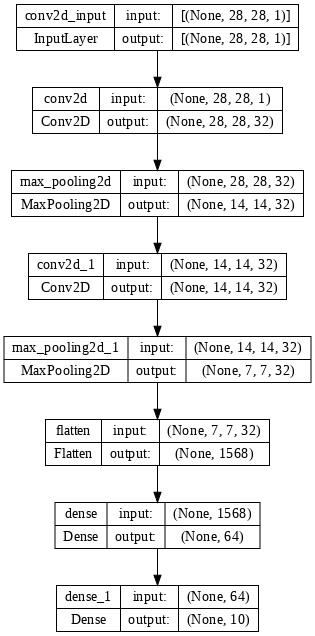

In [50]:
plot_model(model=cnn, dpi=72, show_shapes=True)

In [45]:
history_cnn = cnn.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_train, y_train))

Epoch 1/20
1875/1875 [==============================] - 82s 43ms/step - loss: 0.1622 - accuracy: 0.9506 - val_loss: 0.0543 - val_accuracy: 0.9838
Epoch 2/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0420 - val_accuracy: 0.9868
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0228 - val_accuracy: 0.9928
Epoch 4/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0245 - val_accuracy: 0.9918
Epoch 5/20
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0142 - val_accuracy: 0.9955
Epoch 6/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0101 - val_accuracy: 0.9970
Epoch 7/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0140 - accuracy: 0.9950 - val_loss: 0.0118 -

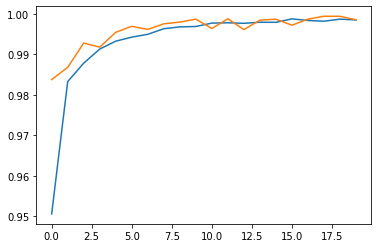

In [46]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])